<a href="https://colab.research.google.com/github/chandrika1004/PRODIGY_DS_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prodigy Infotech Datascience Internship - Task 3

#TASK: Build adecision tree classifier to predict whether a customer will purchse a product or service based on their demographic and behavioural data.Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository

##Importing necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

##Loading the dataset

In [18]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##Data Exploration

In [19]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
bank.shape

(45210, 17)

In [21]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   marital    45210 non-null  object
 3   education  45210 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    45210 non-null  object
 9   day        45210 non-null  int64 
 10  month      45210 non-null  object
 11  durations  45210 non-null  int64 
 12  campaign   45210 non-null  int64 
 13  pdays      45210 non-null  int64 
 14  previous   45210 non-null  int64 
 15  poutcome   45210 non-null  object
 16  y          45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
bank.describe()

,age,balance,day,durations,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.936297,1362.236474,15.806392,258.160805,2.763858,40.194559,0.580093
std,10.618863,3044.790103,8.322566,257.530206,3.098053,100.127440,2.302945
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.750000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##Target Class Distribution

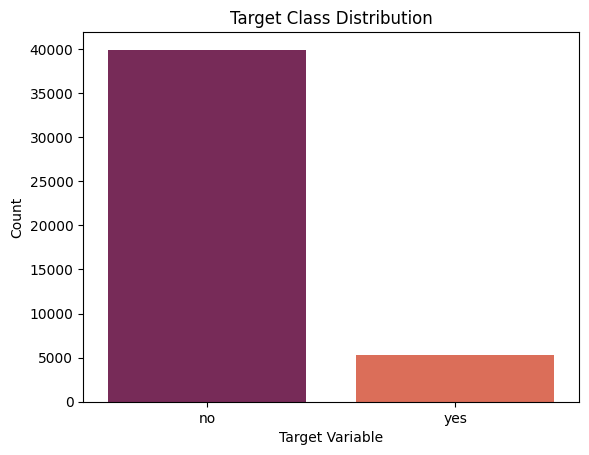

In [24]:
sns.countplot(x='y',hue='y',data=bank,palette='rocket',legend=False)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

##Age Distribution by Purchase Decision

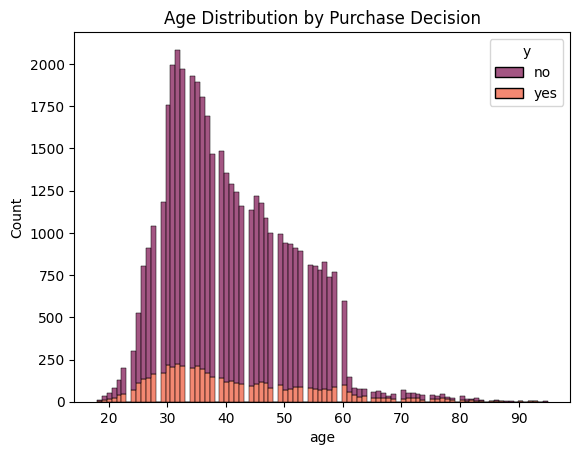

In [25]:
sns.histplot(data=bank,x='age',hue='y',multiple='stack',palette='rocket')
plt.title('Age Distribution by Purchase Decision')
plt.show()

##Checking categorical columns

In [26]:
categorical_cols=bank.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"{col}:{bank[col].unique()}")

job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'unknown' 'primary']
default:['no' 'yes']
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome:['unknown' 'failure' 'other' 'success']
y:['no' 'yes']


##Visualizing Categorical vs Target

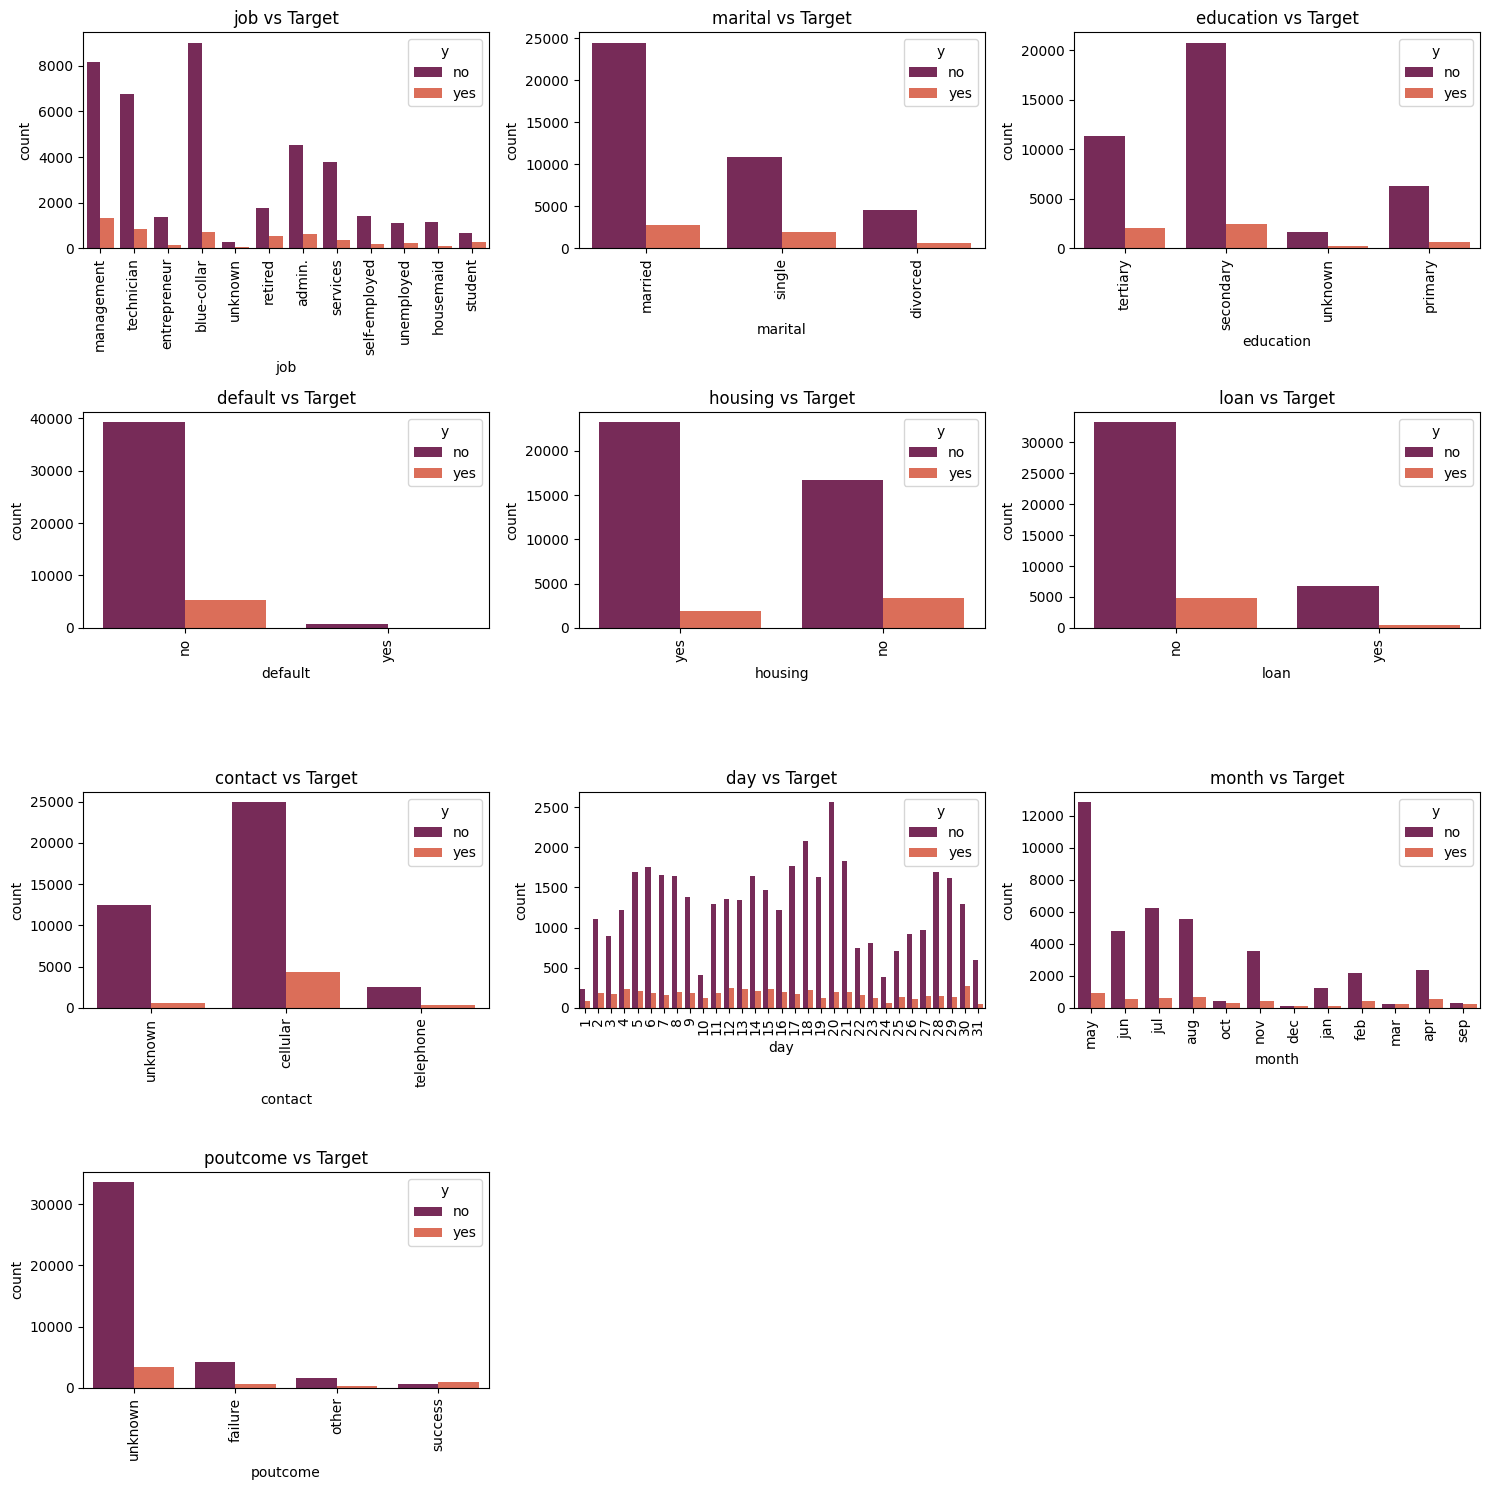

In [27]:
column=['age','balance','durations','campaign','pdays','previous','y']
column1=bank.drop(columns=column,axis=1)
column2=column1.columns
n_cols=3
n_rows=(len(column2)+n_cols-1)//n_cols
plt.figure(figsize=(15,15))
for i,col in enumerate(column2):
  plt.subplot(n_rows,n_cols,i+1)
  sns.countplot(x=col,hue='y',data=bank,palette='rocket')
  plt.title(f'{col} vs Target')
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
bank_encoded = bank.copy()
le = LabelEncoder()
for col in categorical_cols:
    bank_encoded[col] = le.fit_transform(bank_encoded[col])

##Train - Test Split

In [29]:
from sklearn.model_selection import train_test_split
X=bank_encoded.drop('y',axis=1)
y=bank_encoded['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

##Model Training and Evaluation

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Classification Report:/n",classification_report(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

Accuracy 0.8753225687532257
Classification Report:/n               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.47      0.49      0.48      1586

    accuracy                           0.88     13563
   macro avg       0.70      0.71      0.70     13563
weighted avg       0.88      0.88      0.88     13563

Confusion Matrix [[11098   879]
 [  812   774]]
